=========================  MOSTRANDO AS PRIMEIRAS DEZ LINHAS
     NOME  IDADE    EX_VIH TRATMTO  EX_VS  EX_TA  EX_TC
0     Ana     10  negativo    rec1  100.0    5.0    2.0
1    Rosa     20  negativo    rec2  500.0    8.0    1.0
2    Anto     30  positivo    rec1  105.0   10.0    3.0
3  Emilio     40  negativo    rec0  200.0    3.0    2.0
4    Joao     25  positivo    rec2    NaN    NaN    NaN
5   Joana     30  negativo    rec1    NaN    NaN    NaN
6   JosÃ©     40  positivo    rec2  150.0    9.0    4.0
7    Joel     30  positivo    rec0  250.0    7.0    5.0
8   Pedro     45  negativo    rec3    NaN    NaN    NaN
=========================  MOSTRANDO NUMEROS DAS LINHAS E COLUNAS
9 LINHAS
7 COLUNAS
=========================  removendo os rregstros nulos
     NOME  IDADE    EX_VIH TRATMTO  EX_VS  EX_TA  EX_TC
0     Ana     10  negativo    rec1  100.0    5.0    2.0
1    Rosa     20  negativo    rec2  500.0    8.0    1.0
2    Anto     30  positivo    rec1  105.0   10.0    3.0
3  Emilio     

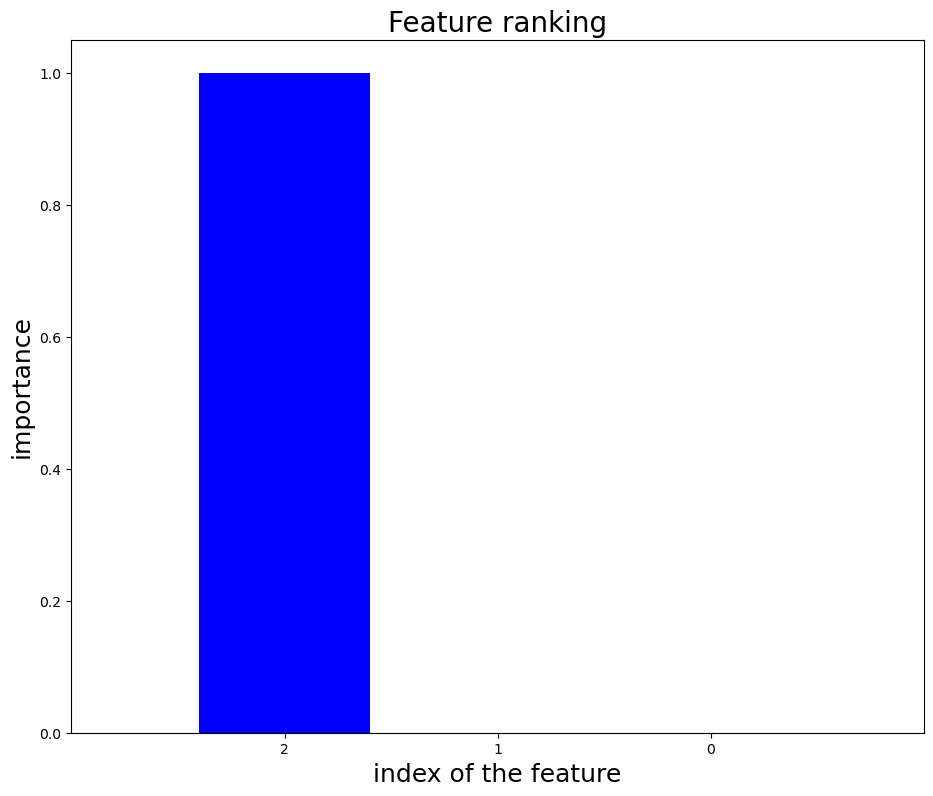

========================= AVALIAR O VALOR REAL DO DATASET Y_TESTE COM AS PREDIÇÕES
ACURÁCIA DA ÁRVORE:  1.0
Matriz de Confusão sem normalizacão 
[[1 0]
 [0 1]]


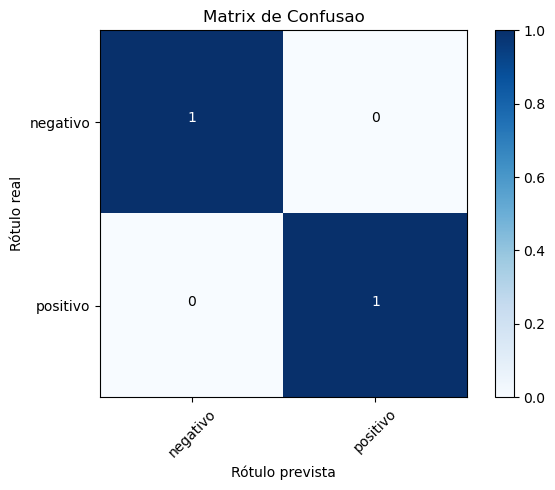

In [21]:
""" As aulas estão disponíveis no YouTube: https://youtu.be/Ze-Q6ZNWpco 

Qualquer dúvida, entre em contato:
https://instagram.com/diogocortiz
https://twitter.com/diogocortiz 

"""
import numpy as np 
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#%conda install python-graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from six import StringIO  # em ve de :  #from sklearn.externals.six import StringIO
#%pip install pydotplus
import pydotplus
from IPython.display import Image

# IMPORTANDO O DATASET PARA O DATAFRAME
path = r"C:\Users\jcp\Documents\PYTHON LABO\Decision_tree\dataset_analise_clinica.csv"
df = pd.read_csv(path, encoding='ISO-8859-1')
#df = pd.read_csv(path, encoding='ISO-8859-1', delimiter =  ';')

# MOSTRANDO AS PRIMEIRAS DEZ LINHAS

print("=========================  MOSTRANDO AS PRIMEIRAS DEZ LINHAS")
print(df.head(10))

print("=========================  MOSTRANDO NUMEROS DAS LINHAS E COLUNAS")
count_row = df.shape[0] # pegando os numeros de registros
count_col = df.shape[1] # pegando os numeros das colunas

print(count_row, "LINHAS")
print(count_col, "COLUNAS")

# REPAREM QUE HÁ MUITOS REGISTROS EM QUE HÁ DADOS FALTANDO NOS CAMPOS

"""Precisamos deixar o dataset somente com os registros que tenham todos os campos (para evitar ruídos e distorções)"""

# REMOVENDO OS REGISTROS NOS QUAIS PELO MENOS UM CAMPO ESTÁ EM BRANCO (NAN) 
print("=========================  removendo os rregstros nulos")
df = df.dropna()
print(df.head(10))

print("=========================  mostrando quantidades de colunas e registros")
print("quantidade de campos", df.shape[1])
print("total de registros", df.shape[0])

#VAMOS VERIFICAR SE O BANCO DE DADOS ESTÁ BALANCEADO OU DESBALANCEADO
print("=========================  verificar numeros de negativos e positivos no campo'ex_vih'")
print("total de registros negativos", df[df["EX_VIH"]=="negativo"].shape[0])
print("total de registros positivos", df[df["EX_VIH"]=="negativo"].shape[0])

# VAMOS JOGAR AS ETIQUETAS PARA Y
print("=========================  armazenar e mostrar todos dados da coluna'ex-vih' para varavel 'y'")
y = df["EX_VIH"].values
print(y)
# X SERÁ A NOSSA MATRIZ COM AS FEATURES
# VAMOS PEGAR OS CAMPOS DE TREINAMENTO (ex_vs, ex_ta, ex_tc
print("=========================  armazenar e mostrar todos dados das ex_vih, ex_ta, ex_tc coluna'ex-vih' para varavel 'x'")
x = df[["EX_VS", "EX_TA", "EX_TC"]].values
print(x)

"""Agora precisamos dividir o nosso Dataset em dois: um para o treino (80% dos dados) e outro para o teste (20% dos dados)"""
print("=========================  nosso Dataset dividido em dois: um para o treino (80% dos dados) e outro para o teste (20% dos dados)")
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size= 0.2, random_state =3)

"""Agora vamos criar o e treinar o nosso modelo. Lembram da diferença entre algortimo e modelo? Existe o algortimo de treinamento (que neste caso é o de árvore de decisão) que irá exportar um modelo treinado (que também é um algoritmo)."""
# CRIAR UM ALGORTIMO QUE SERÁ DO TIPO DE ÁRVORE DE DECISÃO

algoritmo_arvore = DecisionTreeClassifier(criterion = "entropy", max_depth = 5) # existe tambem criterio="gil" para modelo 'decisionTreeclassifier' que permite criar a arvore de decision e 'depth=5' define a altura max dda arvore evvtando asim overfit

# AGORA EM MINHA_ARVORE EU TENHO ASSOCIADA A ELA O ALGORITMO DE TREINAMENTO, 
# BASICAMENTE A RECEITA QUE VIMOS NA PARTE TÉORICA. 

#AGORA PRECISAMOS TREINÁ-LA
modelo = algoritmo_arvore.fit(x_treino, y_treino) # exportou a arvore de decision para a variavel 'modelo'

"""A árvore de decisão pode ser considerada um modelo White Box, ou seja, um modelo que podemos entender melhor o que ele aprendeu e como ele decide. Podemos mostrar a árvore para isso."""

#PODEMOS MOSTRAR A FEATURE MAIS IMPORTANTE (WHITE BOX?)
print("========================= MOSTRAR A FEATURE MAIS IMPORTANTE (WHITE BOX?")
print(modelo.feature_importances_)
      
nome_features = ['EX_VIH', 'EX_TA', 'EX_TC']
nome_classes = modelo.classes_
      
# MONTAR A IMAGEM DA ÁRVORE
print("========================= MONTAR A IMAGEM DA ÁRVORE")
dot_data = StringIO()
export_graphviz(modelo, out_file =  dot_data, filled = True, feature_names = nome_features, class_names = nome_classes, rounded = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
graph.write_png("arvore.png")
Image("arvore.png")

"""E podemos entender também quais as features de maior importância para o modelo treinado"""
print("========================= mostrar features de maior importância para o modelo treinado")

importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]
print("feature ranking:")

for f in range(x.shape[1]):
       print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(x.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)
plt.show()


#Indice das features
# 0 - 'ex_vih'
# 1 - 'ex_ta'
# 2 - 'ex_tc',


"""Vamos testar o modelo, fazendo as predições no dataset de teste."""

# APLICANDO O MODELO NA BASE DE TESTES E ARMAZENDO O RESULTADO EM Y_PREDICOES
Y_predicoes = modelo.predict(x_teste)

#AVALIAÇÃO DO MODELO 
#VAMOS AVALIAR O VALOR REAL DO DATASET Y_TESTE COM AS PREDIÇÕES
print("========================= AVALIAR O VALOR REAL DO DATASET Y_TESTE COM AS PREDIÇÕES")
print("ACURÁCIA DA ÁRVORE: ", accuracy_score(y_teste, Y_predicoes))
#print (classification_report(y, Y_predicoes))  # null valor error generated in execution, that why is commtted



# PRECISÃO: DAS CLASSIFICAÇÕES QUE O MODELO FEZ PARA UMA DETERMINADA CLASSE, QUANTAS EFETIVAMENTE ERAM CORRETAS?
# RECALL: DOS POSSÍVEIS DATAPOINTS PERTECENTES A UMA DETERMINADA CLASSE, QUANTOS O MODELO CONSEGIU CLASSIFICAR CORRETAMENTE?

"""Vamos entender a Matriz de Confusão"""
print("========================= prints and plots the confusion matrix")
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusão Normalizada")
    else:
        print('Matriz de Confusão sem normalizacão ')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Rótulo real')
    plt.xlabel('Rótulo prevista')

matrix_confusao = confusion_matrix(y_teste, Y_predicoes)
plt.figure()
plot_confusion_matrix(matrix_confusao, classes=nome_classes,
                      title='Matrix de Confusao')






